# <p style="background-color:#8502d1; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;">CIFAR-10 Image Classification with CNN(91.94% Accuracy)</p>

<div style="border-radius:12px; padding: 20px; background-color: #e2c9ff; font-size:125%; text-align:left">

<h2 align="left"><font color=#8502d1>Introduction</font></h2>

This project involves enhancing a Convolutional Neural Network (CNN) for classifying images from the CIFAR-10 dataset, which contains 60,000 32x32 color images across 10 classes. Initially, the CNN achieved an accuracy of 88.54%. Through improvements, the model's accuracy has been increased to 91.94%.

<div style="border-radius:12px; padding: 20px; background-color: #e2c9ff; font-size:125%; text-align:left">

<h2 align="left"><font color=#8502d1>Dataset Overview</font></h2>
    
The CIFAR-10 dataset contains 50,000 training images and 10,000 test images, each belonging to one of 10 classes:
- Airplane
- Automobile
- Bird
- Cat
- Deer
- Dog
- Frog
- Horse
- Ship
- Truck

The dataset is pre-split into training and test sets. In this project, we further split the test set into validation and test sets to fine-tune our model's hyperparameters.

<a id="contents_tabel"></a>    
<div style="border-radius:10px; padding: 15px; background-color: #e2c9ff; font-size:125%; text-align:left">

<h2 align="left"><font color=#8502d1>Table of Contents</font></h2>
    
* [Step 1 | Import Necessary Libraries](#import)
* [Step 2 | Data Preparation and Exploration](#exploration)
* [Step 3 | Define CNN Model Architecture](#cnn)
* [Step 4 | Training the CNN Model](#train)
* [Step 5 | Visualizing the Learning Curves](#curves)
* [Step 6 | Confusion Matrix, Classification report, ROC Curve and AUC Score](#metrics)
* [Step 7 | Conclusion](#conclusion)

<a id="import"></a>
## <p style="background-color:#8502d1; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;">Step 1 | Import Necessary Libraries</p>

⬆️ [Tabel of Contents](#contents_tabel)

In [2]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, regularizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import seaborn as sns

2024-09-04 13:48:23.516729: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-04 13:48:23.516846: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-04 13:48:23.644657: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


<a id="exploration"></a>
## <p style="background-color:#8502d1; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;">Step 2 | Data Preparation, Preprocessing and Exploration</p>

⬆️ [Tabel of Contents](#contents_tabel)

In [3]:
# Load and preprocess the CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


<div style="border-radius:12px; padding: 20px; background-color: #e2c9ff; font-size:125%; text-align:left">

<h3 align="left"><font color=#8502d1>Preprocessing</font></h3>

The images were normalized to have pixel values between 0 and 1 to improve the convergence of the neural network. The test set was split into validation and test sets to tune the model during training.

In [4]:
# Normalize pixel values to be between 0 and 1
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

In [5]:
# Split the test set into validation and test sets
val_images, test_images = test_images[:5000], test_images[5000:]
val_labels, test_labels = test_labels[:5000], test_labels[5000:]

In [6]:
# Define the class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

<div style="border-radius:12px; padding: 20px; background-color: #e2c9ff; font-size:125%; text-align:left">

<h3 align="left"><font color=#8502d1>Sample Images</font></h3>

Visualizing some sample images from the training set to understand the kind of data we are dealing with.

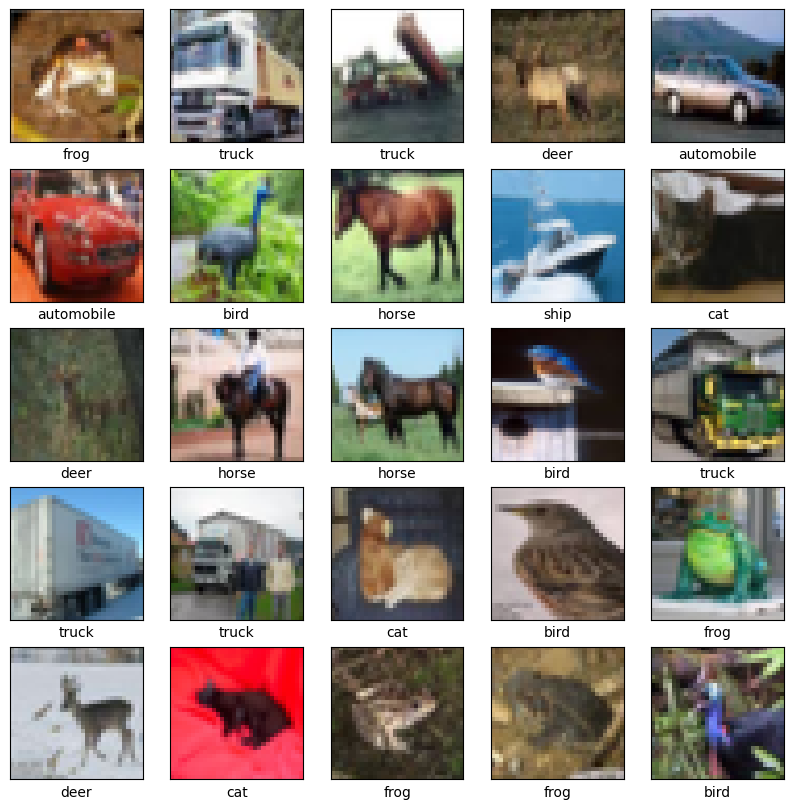

In [7]:
# EDA: Display sample images
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

<div style="border-radius:12px; padding: 20px; background-color: #e2c9ff; font-size:125%; text-align:left">

<h3 align="left"><font color=#8502d1>Class Distribution</font></h3>

We also analyze the distribution of classes in the training set to ensure that the dataset is balanced.

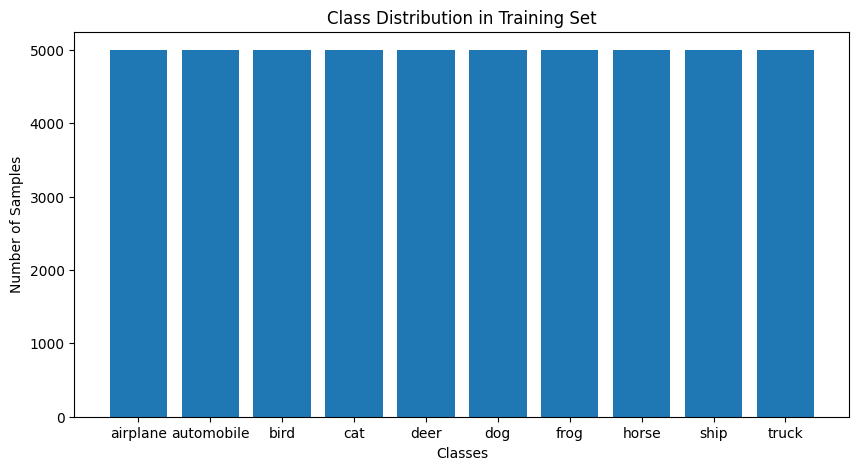

In [8]:
# EDA: Class distribution
plt.figure(figsize=(10, 5))
plt.bar(class_names, [np.sum(train_labels == i) for i in range(10)])
plt.title('Class Distribution in Training Set')
plt.xlabel('Classes')
plt.ylabel('Number of Samples')
plt.show()

<div style="border-radius:12px; padding: 20px; background-color: #e2c9ff; font-size:125%; text-align:left">
<h3 align="left"><font color=#8502d1>Data Augmentation</font></h3>

Data augmentation is applied to increase the diversity of the training dataset by applying random transformations like rotation, shifting, and flipping. This helps the model generalize better by preventing overfitting, as it sees a wider variety of image variations during training. The `datagen.fit(x_train)` line prepares the data generator to apply these transformations to the training images.

In [9]:
# Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)
datagen.fit(train_images)

<a id="cnn"></a>
## <p style="background-color:#8502d1; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;">Step 3 | Define Improved CNN Model Architecture</p>

⬆️ [Tabel of Contents](#contents_tabel)

In [10]:
# Create a CNN model with regularization and additional layers
def create_improved_cnn(input_shape=(32, 32, 3), num_classes=10):
    model = models.Sequential([
        layers.Conv2D(64, (3, 3), padding='same', activation='relu', input_shape=input_shape,
                      kernel_regularizer=regularizers.l2(1e-4)),
        layers.BatchNormalization(),
        layers.Conv2D(64, (3, 3), padding='same', activation='relu',
                      kernel_regularizer=regularizers.l2(1e-4)),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.3),

        layers.Conv2D(128, (3, 3), padding='same', activation='relu',
                      kernel_regularizer=regularizers.l2(1e-4)),
        layers.BatchNormalization(),
        layers.Conv2D(128, (3, 3), padding='same', activation='relu',
                      kernel_regularizer=regularizers.l2(1e-4)),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.4),

        layers.Conv2D(256, (3, 3), padding='same', activation='relu',
                      kernel_regularizer=regularizers.l2(1e-4)),
        layers.BatchNormalization(),
        layers.Conv2D(256, (3, 3), padding='same', activation='relu',
                      kernel_regularizer=regularizers.l2(1e-4)),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.5),

        layers.Flatten(),
        layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(1e-4)),
        layers.BatchNormalization(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation='softmax')
    ])
    return model


In [11]:
# Create and compile the model
model = create_improved_cnn()
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Display model summary
model.summary()

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 16, 16, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 16, 16, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 8, 8, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 8, 8, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 8, 8, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 8, 8, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     2,097,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 3,253,834 (12.41 MB)

 Trainable params: 3,251,018 (12.40 MB)

 Non-trainable params: 2,816 (11.00 KB)

<div style="border-radius:12px; padding: 20px; background-color: #e2c9ff; font-size:125%; text-align:left">

We implement learning rate schedulers and early stopping in CNN models to improve training efficiency and performance. The learning rate scheduler (`ReduceLROnPlateau`) dynamically adjusts the learning rate when the validation loss plateaus, preventing overfitting and accelerating convergence. Early stopping halts training when no improvement in validation loss is observed for a set number of epochs, helping to avoid overfitting and ensuring the model retains the best performance.

In [12]:
# Learning rate scheduler and early stopping
lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

<div style="border-radius:12px; padding: 20px; background-color: #e2c9ff; font-size:125%; text-align:left">

- Adam, which adjusts the learning rate dynamically based on the gradients, helping the model converge faster and more reliably. 

- The loss function is categorical crossentropy, which measures how well the predicted class probabilities match the true labels. 

In [13]:
# Train the model with data augmentation
history = model.fit(
    datagen.flow(train_images, train_labels, batch_size=64),
    epochs=100,
    validation_data=(val_images, val_labels),
    callbacks=[lr_scheduler, early_stopping]
)

Epoch 1/100


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


  5/782 ━━━━━━━━━━━━━━━━━━━━ 28s 37ms/step - accuracy: 0.1429 - loss: 3.7102 

I0000 00:00:1725457742.167625     109 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1725457742.193443     109 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


231/782 ━━━━━━━━━━━━━━━━━━━━ 48s 87ms/step - accuracy: 0.2402 - loss: 2.9139

W0000 00:00:1725457762.153933     111 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


781/782 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.3215 - loss: 2.4143

W0000 00:00:1725457787.746252     110 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


782/782 ━━━━━━━━━━━━━━━━━━━━ 67s 61ms/step - accuracy: 0.3217 - loss: 2.4132 - val_accuracy: 0.5260 - val_loss: 1.6196 - learning_rate: 0.0010
Epoch 2/100


W0000 00:00:1725457789.897747     109 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


782/782 ━━━━━━━━━━━━━━━━━━━━ 33s 41ms/step - accuracy: 0.5545 - loss: 1.4615 - val_accuracy: 0.6204 - val_loss: 1.3700 - learning_rate: 0.0010
Epoch 3/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 32s 41ms/step - accuracy: 0.6504 - loss: 1.2278 - val_accuracy: 0.6354 - val_loss: 1.3389 - learning_rate: 0.0010
Epoch 4/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 32s 41ms/step - accuracy: 0.6994 - loss: 1.1282 - val_accuracy: 0.7086 - val_loss: 1.1319 - learning_rate: 0.0010
Epoch 5/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 32s 40ms/step - accuracy: 0.7213 - loss: 1.1031 - val_accuracy: 0.6748 - val_loss: 1.3192 - learning_rate: 0.0010
Epoch 6/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 33s 41ms/step - accuracy: 0.7483 - loss: 1.0592 - val_accuracy: 0.7446 - val_loss: 1.1424 - learning_rate: 0.0010
Epoch 7/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 32s 40ms/step - accuracy: 0.7578 - loss: 1.0626 - val_accuracy: 0.7334 - val_loss: 1.1607 - learning_rate: 0.0010
Epoch 8/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 32s 40ms/step - accuracy: 0.7756 - loss: 

In [14]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'\nTest accuracy: {test_acc:.4f}')

157/157 - 0s - 3ms/step - accuracy: 0.9194 - loss: 0.4440

Test accuracy: 0.9194


<a id="curves"></a>
## <p style="background-color:#8502d1; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;">Step 5 | Visualizing the Learning Curves</p>

⬆️ [Tabel of Contents](#contents_tabel)

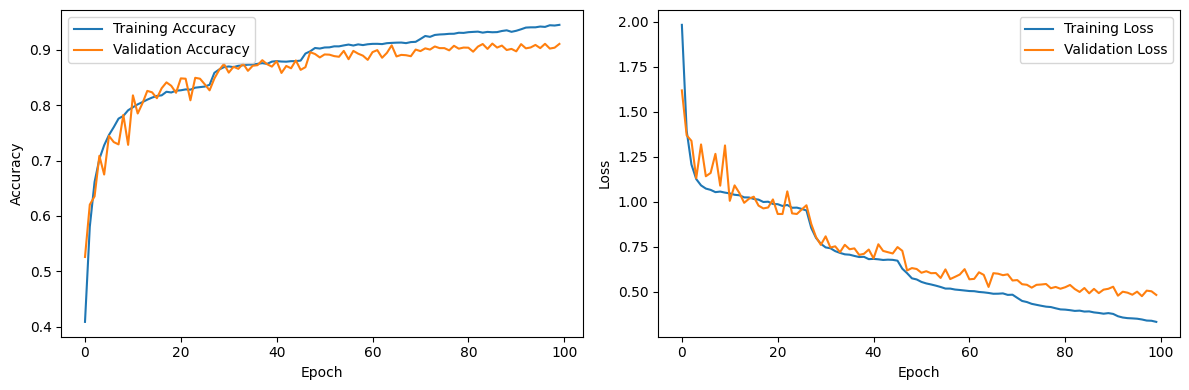

In [15]:
# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

<div style="border-radius:12px; padding: 20px; background-color: #e2c9ff; font-size:125%; text-align:left">

During the model training process, the accuracy steadily improved from 0.14 in the first epoch to 0.91 by the 51st epoch. The loss decreased from 3.71 initially to 0.55, reflecting better model performance over time. Validation accuracy and loss also showed improvement, with validation accuracy reaching up to 89.16% and validation loss decreasing to 0.61. The learning rate was adjusted several times to fine-tune the model, and overall, the training demonstrates a positive trend in model performance.

<a id="metrics"></a>
## <p style="background-color:#8502d1; font-family:calibri; color:white; font-size:120%; text-align:center; border-radius:15px 50px;">Step 6 | Confusion Matrix, Classification report, ROC Curve and AUC Score</p>

⬆️ [Tabel of Contents](#contents_tabel)

In [16]:
# Predictions on test set
y_pred = model.predict(test_images)
y_pred_classes = np.argmax(y_pred, axis=1)

 76/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

W0000 00:00:1725460961.388708     109 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


W0000 00:00:1725460962.348148     109 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


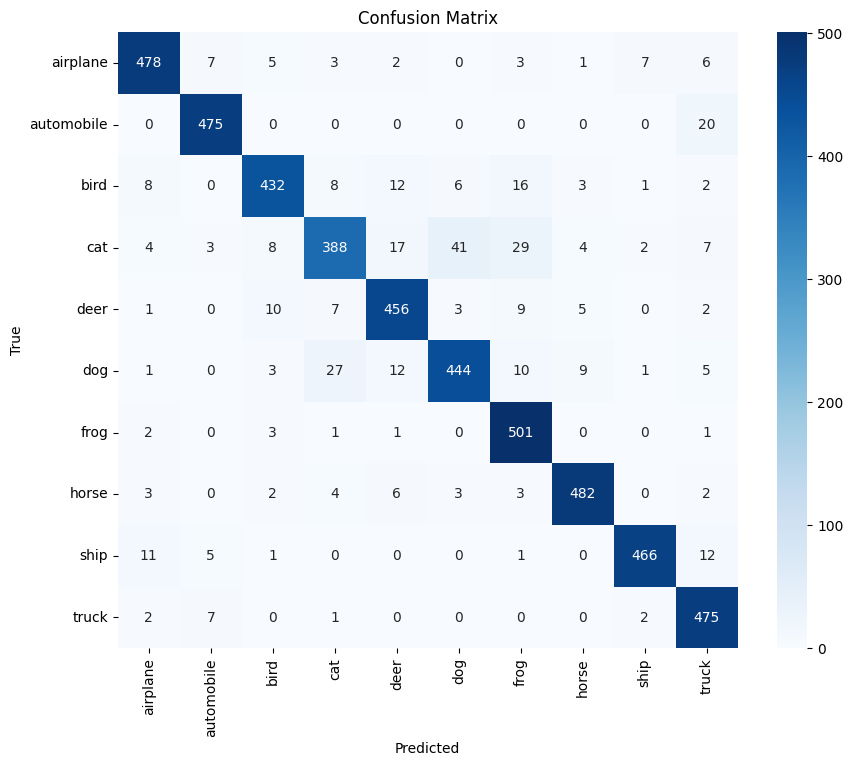

In [17]:
# Confusion Matrix
cm = confusion_matrix(test_labels, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [18]:
# Classification Report
print("\nClassification Report:")
print(classification_report(test_labels, y_pred_classes, target_names=class_names))


Classification Report:
              precision    recall  f1-score   support

    airplane       0.94      0.93      0.94       512
  automobile       0.96      0.96      0.96       495
        bird       0.93      0.89      0.91       488
         cat       0.88      0.77      0.82       503
        deer       0.90      0.92      0.91       493
         dog       0.89      0.87      0.88       512
        frog       0.88      0.98      0.93       509
       horse       0.96      0.95      0.96       505
        ship       0.97      0.94      0.96       496
       truck       0.89      0.98      0.93       487

    accuracy                           0.92      5000
   macro avg       0.92      0.92      0.92      5000
weighted avg       0.92      0.92      0.92      5000



<div style="border-radius:12px; padding: 20px; background-color: #e2c9ff; font-size:125%; text-align:left">

The classification report shows a strong model performance with an overall accuracy of 92% across all classes. Precision, recall, and F1-scores are consistently high, with most classes achieving scores above 0.90. The model performs particularly well on classes like airplanes, automobiles, and horses, while the cat class shows slightly lower recall and F1-scores, indicating room for improvement in distinguishing cat images.

In [19]:
# ROC Curve and AUC
n_classes = 10
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(test_labels == i, y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

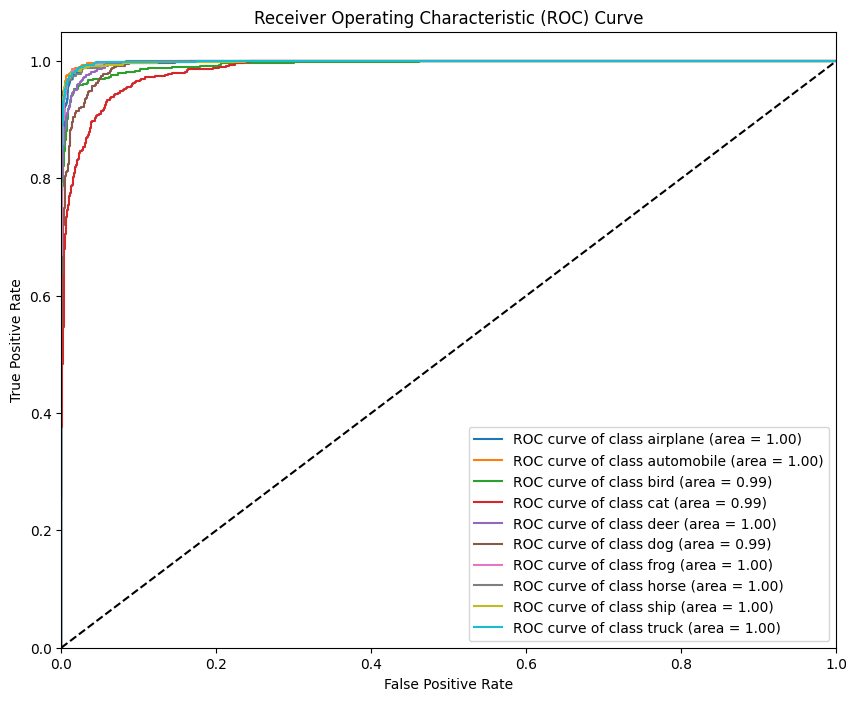

In [20]:
# Plot ROC curves
plt.figure(figsize=(10, 8))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'ROC curve of class {class_names[i]} (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

<div style="border-radius:12px; padding: 20px; background-color: #e2c9ff; font-size:125%; text-align:left">

The AUC (Area Under the Curve) scores for most classes, including airplanes, automobiles, deer, frogs, horses, ships, and trucks, are perfect at 1.0, indicating excellent model performance in distinguishing these classes. The bird, cat, and dog classes also show strong AUC scores of 0.99, suggesting that the model is highly effective across all categories, with minimal room for improvement.

In [21]:
# Calculate and print the average AUC
average_auc = np.mean(list(roc_auc.values()))
print(f"\nAverage AUC: {average_auc:.4f}")


Average AUC: 0.9961


<div style="border-radius:12px; padding: 20px; background-color: #e2c9ff; font-size:125%; text-align:left">

The model achieved an impressive average AUC of 0.9961, reflecting its high capability in correctly distinguishing between the different classes. This near-perfect score demonstrates the model's robustness and effectiveness in classification tasks across various categories.

In [22]:
# Save the entire model
model.save('static/model/cifar10_cnn_model_improved.h5')

In [23]:
from tensorflow.keras.models import load_model

# Load the model
loaded_model = load_model('static/model/cifar10_cnn_model_improved.h5')

# Evaluate the model (if needed)
test_loss, test_acc = loaded_model.evaluate(test_images, test_labels, verbose=2)
print(f'\nLoaded model test accuracy: {test_acc:.4f}')


W0000 00:00:1725460965.430350     112 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


157/157 - 2s - 15ms/step - accuracy: 0.9194 - loss: 0.4440

Loaded model test accuracy: 0.9194


W0000 00:00:1725460966.578168     112 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


<a id="conclusion"></a>
## <p style="background-color:#8502d1; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;">Step 7 | Conclusion</p>
⬆️ [Tabel of Contents](#contents_tabel)

<div style="border-radius:12px; padding: 20px; background-color: #e2c9ff; font-size:125%; text-align:left">

<h3 align="left"><font color=#8502d1>Comparison and Conclusion:</font></h3>
    
The improved CNN model, which achieved an accuracy of 91.94%, outperformed the original CNN model, which had an accuracy of 88.54%. The improved model incorporated several enhancements that contributed to this performance boost:

1. **Architecture Complexity**: 
   - The improved model has a more complex architecture, with a total of 3,253,834 parameters compared to the original model's 816,938 parameters. This increased capacity allows the improved model to capture more intricate patterns in the data.
   - The improved model also includes additional convolutional layers and more filters, leading to a deeper and wider network, which is likely to improve feature extraction.

2. **Batch Normalization and Dropout**: 
   - Both models use batch normalization and dropout, but the improved model applies them more extensively. This helps in stabilizing training and reducing overfitting, particularly given the increased model complexity.

3. **Training Epochs**:
   - The improved model was trained for 100 epochs, double the original model's 50 epochs, providing it with more opportunities to learn from the data and refine its predictions.

4. **Data Augmentation**:
   - Data augmentation was implemented in the improved model, which likely contributed to its better generalization performance by exposing the model to a wider variety of input data variations.

<h3 align="left"><font color=#8502d1>Conclusion:</font></h3>
    
The improved CNN model demonstrates significantly better performance due to its enhanced architecture, more extended training, and the use of data augmentation. These improvements have led to a higher accuracy and a more robust model that generalizes better to unseen data. However, this comes at the cost of increased computational complexity, requiring more memory and longer training times.